# H1 Text Classification with a Basic feed-forward neural network

In [10]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [11]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


In [35]:
import pandas as pd

df = pd.read_csv('../data/external/train.csv')

text = df['text'].values
labels = df['target'].values

training_size = int(len(text) * 0.8)

6090


In [36]:
training_sentences = text[0:training_size]
testing_sentences = text[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [37]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [38]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
print(f"Training padded shape: {training_padded.shape}")
print(f"Training labels shape: {training_labels.shape}")
print(f"Testing padded shape: {testing_padded.shape}")
print(f"Testing labels shape: {testing_labels.shape}")

Training padded shape: (6090, 100)
Training labels shape: (6090,)
Testing padded shape: (1523, 100)
Testing labels shape: (1523,)


In [56]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


191/191 - 2s - 13ms/step - accuracy: 0.5793 - loss: 0.6777 - val_accuracy: 0.5345 - val_loss: 0.6856
Epoch 2/30
191/191 - 1s - 3ms/step - accuracy: 0.5793 - loss: 0.6682 - val_accuracy: 0.5345 - val_loss: 0.6876
Epoch 3/30
191/191 - 1s - 3ms/step - accuracy: 0.6332 - loss: 0.6394 - val_accuracy: 0.6573 - val_loss: 0.6272
Epoch 4/30
191/191 - 1s - 3ms/step - accuracy: 0.7328 - loss: 0.5700 - val_accuracy: 0.7275 - val_loss: 0.5708
Epoch 5/30
191/191 - 1s - 3ms/step - accuracy: 0.7785 - loss: 0.5068 - val_accuracy: 0.7669 - val_loss: 0.5288
Epoch 6/30
191/191 - 1s - 3ms/step - accuracy: 0.8169 - loss: 0.4488 - val_accuracy: 0.7498 - val_loss: 0.5211
Epoch 7/30
191/191 - 1s - 3ms/step - accuracy: 0.8251 - loss: 0.4137 - val_accuracy: 0.6730 - val_loss: 0.5652
Epoch 8/30
191/191 - 1s - 3ms/step - accuracy: 0.8470 - loss: 0.3818 - val_accuracy: 0.7971 - val_loss: 0.4749
Epoch 9/30
191/191 - 1s - 3ms/step - accuracy: 0.8629 - loss: 0.3526 - val_accuracy: 0.7223 - val_loss: 0.5891
Epoch 10/30

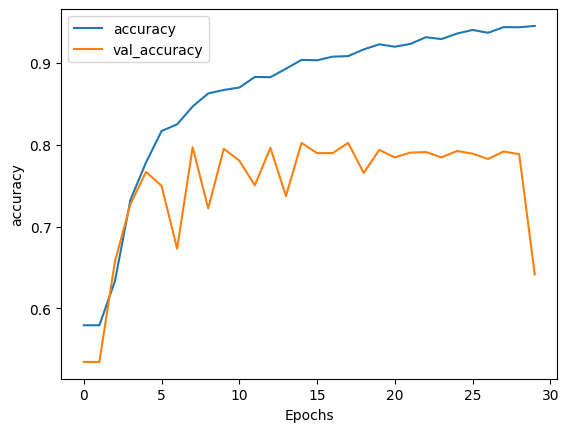

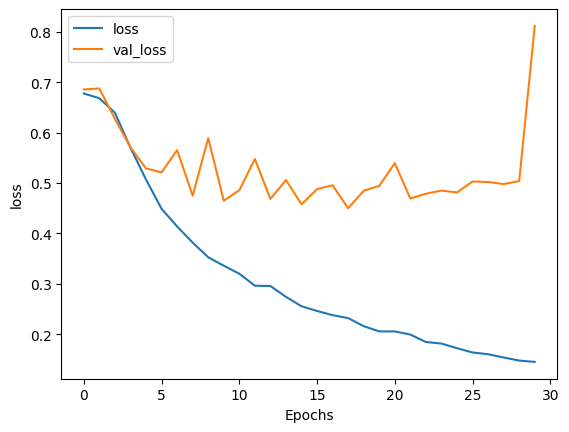

In [57]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [58]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

our deeds are the reason of this earthquake may allah forgive us all ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
1


In [59]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)
